In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from matplotlib import style
import random
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

In [3]:
df = pd.read_csv("football_data.csv")
df = df.drop(['Unnamed: 0', 'Unnamed: 60', 'Club', 'Nationality', 'Age', 'Value', 'Special', 'Preferred Foot', 'Weak Foot', 'Wage', 'Overall', 'Potential', 'Jersey Number', 'Joined', 'Real Face', 'Body Type', 'Loaned From', 'Height', 'Weight', 'Release Clause', 'Contract Valid Until', 'International Reputation', 'ID'], axis=1)
df = df.dropna()
dfGK = df.copy()
indexAge = df[df['Position'] == "No"].index
df.drop(indexAge, inplace=True)

In [4]:
# count = 0
def convert_float(x):
    global count
    x = str(x)
    if x[-2:] == "+2": 
        x = int(x[:-2])
        x += 2
        count += 1
    return float(x)
df['Crossing'] = df['Crossing'].apply(convert_float)
df['Work Rate'] = df['Work Rate'].replace(["Low/ Low", "Medium/ Low", "Low/ Medium", "High/ Low", "Medium/ Medium", "Low/ High", "High/ Medium", "Medium/ High", "High/ High"], [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])

In [5]:
df.columns

Index(['Name', 'Skill Moves', 'Work Rate', 'Position', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [6]:
X = df.iloc[:, [1, 2] + [i for i in range(4, 38)]].values
y = df.iloc[:, [3]]

In [7]:
class K_Means:
    def __init__(self, k, tol = 0.001, max_iter = 300.0):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(int(self.max_iter)):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [8]:
clf = K_Means(4)
clf.fit(X[:180])

In [9]:
colors = 10 * ["g","r","blue","c", "orange", 'y', 'm']
markers = 10 * ["p","*","o","^", "+"]

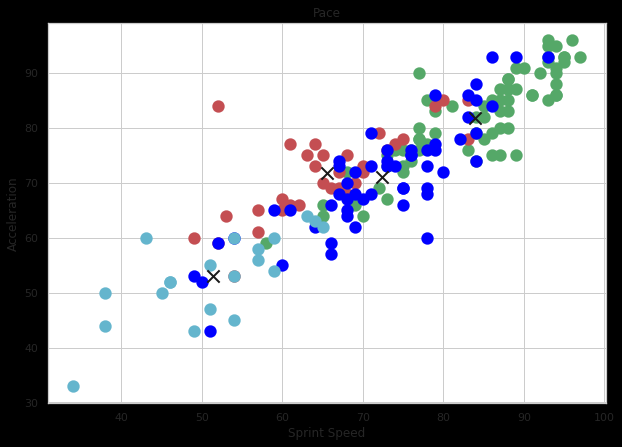

In [10]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

# plt.style.use('seaborn')

# sns.set(style = 'whitegrid')

sns.set(style = 'whitegrid')

for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[12], featureset[13], marker='o', color=color, s=150, linewidths = 0.1)
        
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][12], clf.centroids[centroid][13], marker = "x", color = "k", s = 150, linewidths = 2)

plt.title('Pace')
plt.xlabel('Sprint Speed')
plt.ylabel('Acceleration')
plt.show()

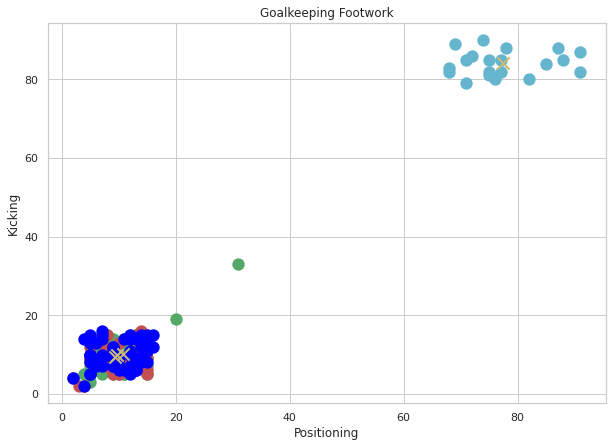

In [11]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)

for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[33], featureset[34], marker='o', color=color, s=150, linewidths = 0.10)
        
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][33], clf.centroids[centroid][34], marker = "x", color = "y", s = 150, linewidths = 2)

plt.title('Goalkeeping Footwork')
plt.xlabel('Positioning')
plt.ylabel('Kicking')
plt.show()

In [12]:
featureset[-9]

63.0

Text(0.5, 0, 'Vision')

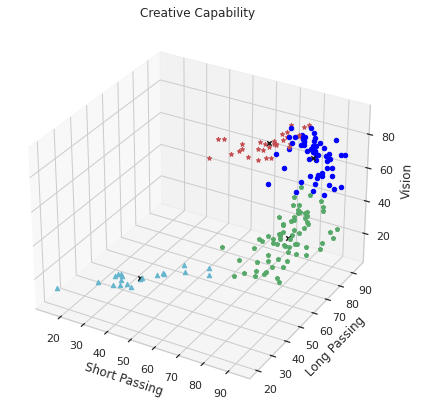

In [13]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
plt.style.use('seaborn-deep')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[5], featureset[10], featureset[-6], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][5], clf.centroids[centroid][10], clf.centroids[centroid][-6], cmap='Greens', marker="x", color='k');
    
ax.set_title('Creative Capability');
ax.set_xlabel('Short Passing')
ax.set_ylabel('Long Passing')
ax.set_zlabel('Vision')

Text(0.5, 0, 'Marking')

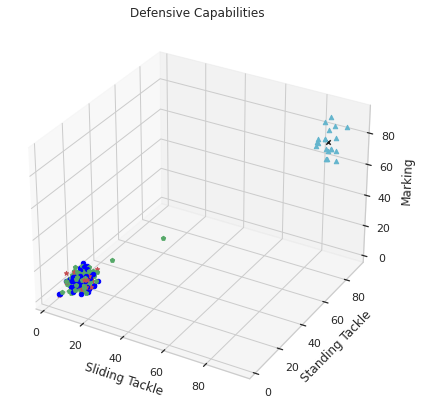

In [14]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[-1], featureset[-2], featureset[-3], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][-1], clf.centroids[centroid][-2], clf.centroids[centroid][-3], cmap='Greens', marker="x", color='k');
    
ax.set_title('Defensive Capabilities');
ax.set_xlabel('Sliding Tackle')
ax.set_ylabel('Standing Tackle')
ax.set_zlabel('Marking')

Text(0.5, 0, 'Sprint Speed')

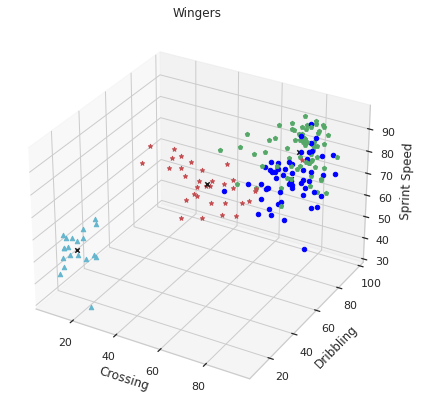

In [15]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[2], featureset[7], featureset[13], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][2], clf.centroids[centroid][7], clf.centroids[centroid][13], cmap='Greens', marker="x", color='k');
    
ax.set_title('Wingers');
ax.set_xlabel('Crossing')
ax.set_ylabel('Dribbling')
ax.set_zlabel('Sprint Speed')

Text(0.5, 0, 'Heading')

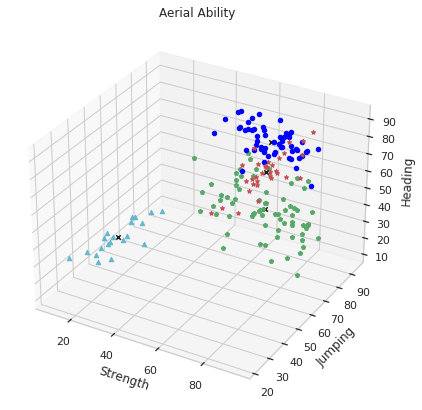

In [16]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[4], featureset[-11], featureset[-13], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][4], clf.centroids[centroid][-11], clf.centroids[centroid][-13], cmap='Greens', marker="x", color='k');
    
ax.set_title('Aerial Ability');
ax.set_xlabel('Strength')
ax.set_ylabel('Jumping')
ax.set_zlabel('Heading')

Text(0.5, 0, 'Curve')

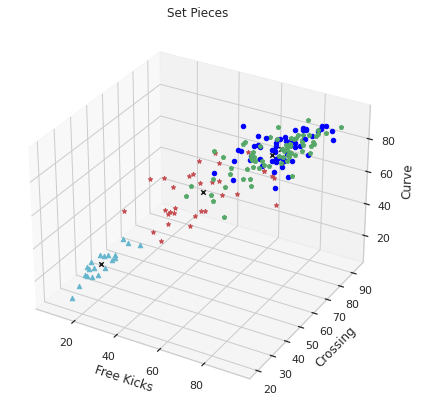

In [17]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[9], featureset[10], featureset[8], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][9], clf.centroids[centroid][10], clf.centroids[centroid][8], cmap='Greens', marker="x", color='k');
    
ax.set_title('Set Pieces');
ax.set_xlabel('Free Kicks')
ax.set_ylabel('Crossing')
ax.set_zlabel('Curve')

Text(0.5, 0, 'Volleys')

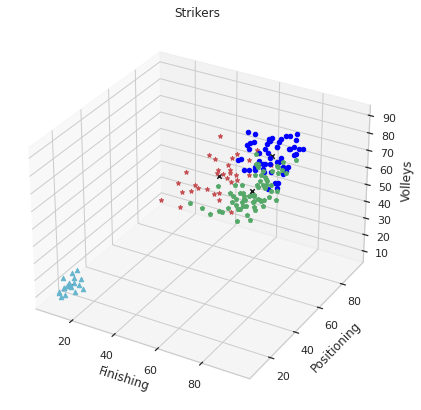

In [18]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[3], featureset[-7], featureset[6], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][3], clf.centroids[centroid][-7], clf.centroids[centroid][6], cmap='Greens', marker="x", color='k');
    
ax.set_title('Strikers');
ax.set_xlabel('Finishing')
ax.set_ylabel('Positioning')
ax.set_zlabel('Volleys')

Text(0.5, 0, 'Skill Moves')

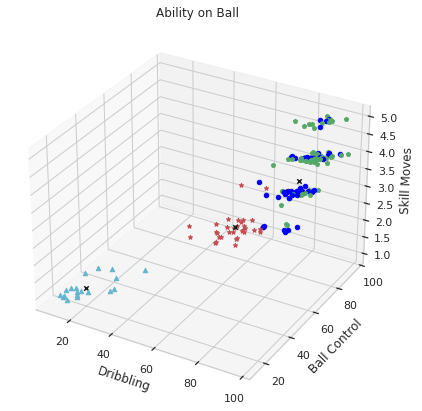

In [19]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[7], featureset[11], featureset[0], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][7], clf.centroids[centroid][11], clf.centroids[centroid][0], cmap='Greens', marker="x", color='k');
    
ax.set_title('Ability on Ball');

ax.set_xlabel('Dribbling')
ax.set_ylabel('Ball Control')
ax.set_zlabel('Skill Moves')

Text(0.5, 0, 'Reflexes')

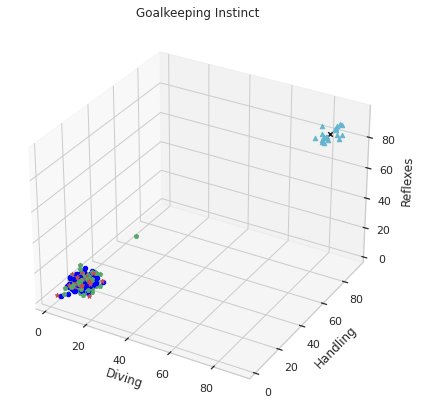

In [20]:
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.axes(projection='3d')
for classification in clf.classifications:
    color = colors[classification]
    marker = markers[classification]
    for i, featureset in enumerate(clf.classifications[classification]):
        ax.scatter3D(featureset[-5], featureset[-4], featureset[-1], cmap='Greens', marker=marker, color=color);
#         plt.scatter(featureset[-9], featureset[-11], marker="o", color=color, s=150, linewidths = 2)

for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][-9], clf.centroids[centroid][-11], marker = "x", color = "y", s = 150, linewidths = 1)
    ax.scatter3D(clf.centroids[centroid][-5], clf.centroids[centroid][-4], clf.centroids[centroid][-1], cmap='Greens', marker="x", color='k');
    
ax.set_title('Goalkeeping Instinct');
ax.set_xlabel('Diving')
ax.set_ylabel('Handling')
ax.set_zlabel('Reflexes')

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

x_, y_ = [], []
    
for key, val in mapping1.items():
    print(f'{key} : {val}')
    x_.append(key)
    y_.append(val)

2 : 68.88410378257898
3 : 59.04068306291542
4 : 53.129911660859754
5 : 50.82760935978431
6 : 48.956559160242136
7 : 47.827022236251025
8 : 46.842213370746514
9 : 46.018677120844245


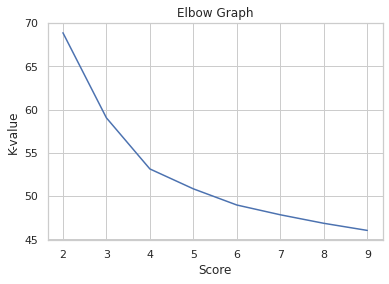

In [22]:
plt.plot(x_, y_)
plt.title("Elbow Graph")
plt.xlabel("Score")
plt.ylabel("K-value")
plt.show()

In [23]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# km = KMeans(n_clusters=3, random_state=42)
# km.fit_predict(X)
# # print(list(km.labels_))
# score = silhouette_score(X, list(km.labels_), metric='euclidean')

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, list(km.labels_), metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.573
Silhouetter Score: 0.306
Silhouetter Score: 0.292
Silhouetter Score: 0.262
Silhouetter Score: 0.227
Silhouetter Score: 0.219
Silhouetter Score: 0.204
Silhouetter Score: 0.201


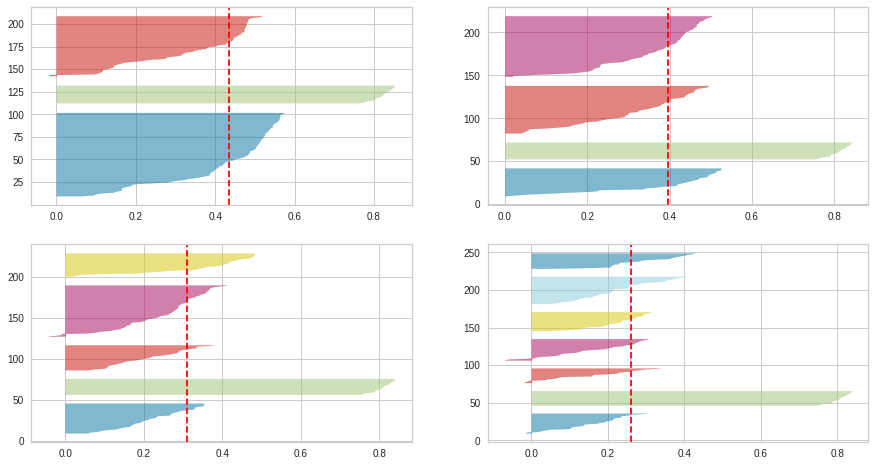

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i , j in [[3, (0, 0)], [4, (0, 1)], [5, (1, 0)], [7, (1, 1)]]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     print(q-1, mod)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[j[0]][j[1]])
    visualizer.fit(X[:180])